<a href="https://colab.research.google.com/github/NoeliaEch/IA2022_Noe/blob/main/DeepLearning/IA_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![separador](https://i.imgur.com/4gX5WFr.png)
# **Transfer Learning**

*Transfer Learning* es una técnica utilizada en Machine Learning en donde un modelo desarrollado para realizar una tarea, es re-utilizado como punto de partida para realizar una segunda tarea.

* Podemos utilizar transfer learning para hacer feature extraction. 
* Tiene la ventaja de disminuir el tiempo de entrenamiento y puede tener un error de generalización menor.
* Los pesos del modelo pre-entrenado se pueden utilizar como punto de partida, es decir que se puede utilizar como un esquema de inicialización de pesos.

![separador](https://i.imgur.com/4gX5WFr.png)

### Notebook de Noe 👻👻
![separador](https://i.imgur.com/4gX5WFr.png)

## **Modelo:** VGG



[Arquitectura VGG16](https://drive.google.com/file/d/1r8FTeG8ER4LbctdMTEDWqeY2ht75zSj6/view)

El 16 en el nombre hace referencia a la cantidad de capas que contienen pesos a ser entrenados. 

* Hay 13 capas convolucionales
* 5 capas max-pooling
* 3 capas densas

Las imagenes de entrada son imagenes de 224x224 a color (3 canales RGB)

Las características principales son:
* Capas convolucionales con filtros de 3x3, stride = 1, padding=1
* Max-Pooling con filtros de 2x2 ,stride = 2. padding = 0

Recodar que:

$W_{final} = \frac{W_{inicial}\;-K\;+2P}{S} + 1$

Siendo 
* K= tamaño del kernel
* P= padding
* S= Stride

---

### Ejemplo de dimensiones de la primera capa convolucional:

> Tamaño de la imagen original $W_{inicial}=224$ <br>
> Tamaño de los filtros $K=3$ <br>
> Stride = 1 <br>
> Padding = 1 <br>
> $W_{final} = \frac{224\;-3\;+2}{1}+1 = 223 + 1 = 224$

### Ejemplo de dimensiones de la primera capa max-pooling
> Tamaño de la "imagen" ingresante $W_{ingresante}=224$ <br>
> Tamaño de los filtros $K=2$ <br>
> Stride = 2 <br>
> Padding = 0 <br>
> $W_{post-pooling} = \frac{224\;-2\;+0}{2}+1 = 111 + 1 = 112$


![separador](https://i.imgur.com/4gX5WFr.png)

In [ ]:
# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16
# Some utils
from tensorflow.keras.utils import plot_model

# load model
model = VGG16()
# summarize the model
model.summary()

553467096/553467096 [==============================] - 12s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

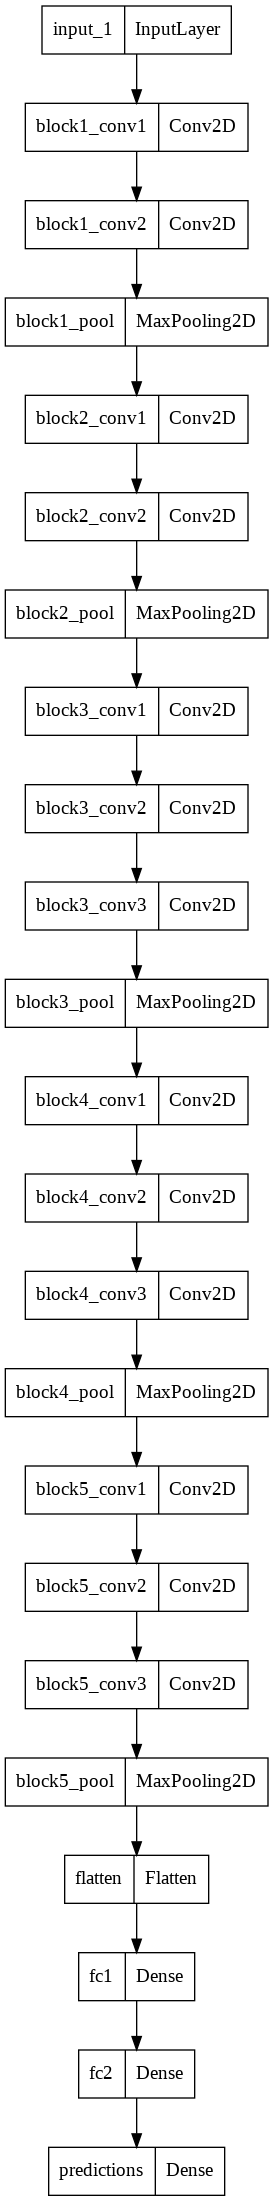

In [ ]:
plot_model(model, "VGG16.png")

![separador](https://i.imgur.com/4gX5WFr.png)

## **Modelo:** InceptionV3

InceptionV3 es la tercera iteración para la arquitectura inception, desarrollada originalmente para el modelo de GoogLeNet.

![separador](https://i.imgur.com/4gX5WFr.png)

96112376/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)           

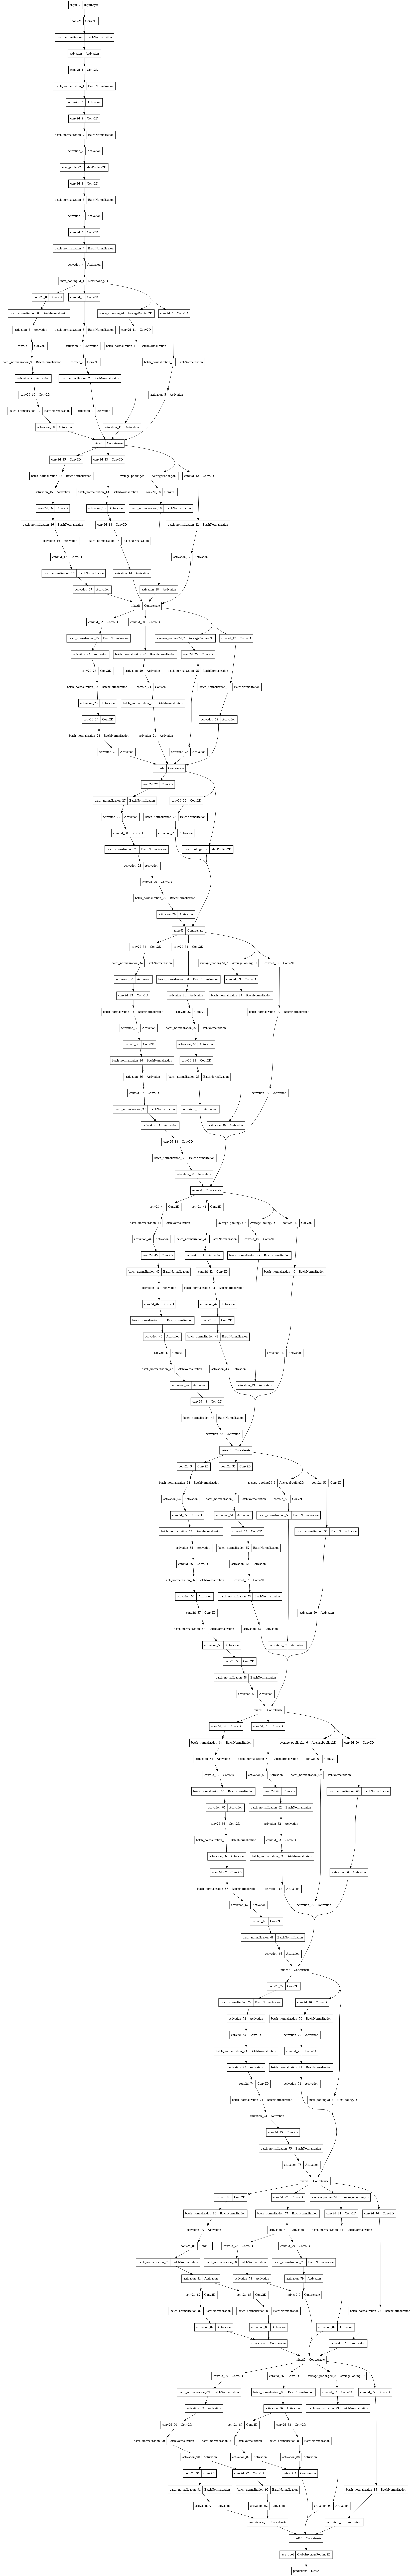

In [ ]:
# example of loading the inception v3 model
from keras.applications.inception_v3 import InceptionV3
# Some utils
from tensorflow.keras.utils import plot_model


# load model
model2 = InceptionV3()
# summarize the model
model2.summary()

plot_model(model2, "Inception.png")

![separador](https://i.imgur.com/4gX5WFr.png)

### **Modelo:** ResNet50

La red residual o ResNet es un modelo que utiliza modulos de residuos para hacer conexiones directas (shorcut connections).

Fue desarrollada por investigadores de Microsoft y descripta en el paper de 2015 titulado "Deep Residual Learning for Image Recognition".

El modelo espera imagenes a color cuadradas de dimensiones 224x224.

![separador](https://i.imgur.com/4gX5WFr.png)

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

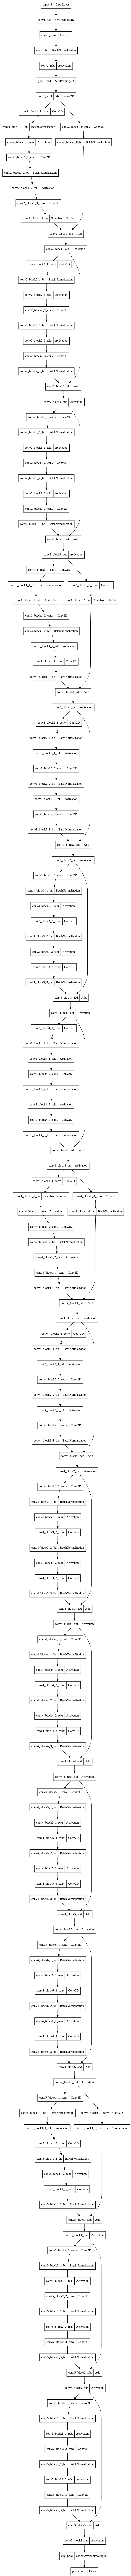

In [ ]:
# importamos el modelo desde tensorflow.keras
from tensorflow.keras.applications.resnet50 import ResNet50
# Para visualizar el grafo
from tensorflow.keras.utils import plot_model


# cargamos el modelo
model3 = ResNet50()
# Vemos el resumen
model3.summary()

plot_model(model3, "ResNet50.png")

![separador](https://i.imgur.com/4gX5WFr.png)


## Utilizando modelos pre-entrenados para clasificar

![separador](https://i.imgur.com/4gX5WFr.png)

---
### Zona de imports

---

In [ ]:
# Zona de imports
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt


---
### Montamos el disco de google drive

---

In [ ]:
# Montamos el disco de google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
### Navegamos hacia la carpeta donde estan las cosas almacenadas

---

In [ ]:
%cd /content/drive/My\ Drive/DatosParaColab/Imagenes
# %cd /content/drive/My\ Drive/


/content/drive/My Drive/DatosParaColab/Imagenes


---
### Listamos el contenido

---

In [ ]:
%ls

gato_siames.jpg  ovejero.jpg  pug.jpeg  simpson_naruto/  simpson_naruto_test/


---
### Cargamos el modelo pre-entrenado

---

In [ ]:

# Cargamos 3 imagenes desde google drive
files = ['ovejero.jpg', 'pug.jpeg', 'gato_siames.jpg']
image1 = load_img(files[1], target_size=(224, 224))

# Convertimos la imagen a un array
image = img_to_array(image1)
# reshape
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# Pre-procesamos la imagen para poder alimentar el modelo vgg
image = preprocess_input(image)
# Cargamos el modelo
model = VGG16()



1/1 [==============================] - 1s 803ms/step
pug (92.35%)


Text(0.5, 1.0, 'pug')

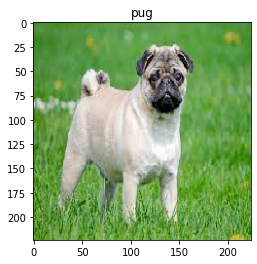

In [ ]:
# Hacemos una predicción
yhat = model.predict(image)
# Convertimos la prediccion a una etiqueta
label = decode_predictions(yhat)
# Recuperamos la etiqueta mas probable
label = label[0][0]
# print la clasificacion
print('%s (%.2f%%)' % (label[1], label[2]*100))

import numpy as np

image1 = np.array(image1)
plt.figure()
plt.imshow(image1)
plt.title(label[1])

![separador](https://i.imgur.com/4gX5WFr.png)

### Transfer learning  con VGG16

![separador](https://i.imgur.com/4gX5WFr.png)

In [ ]:
from tensorflow.keras.preprocessing import  image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np

myTrainDir = "/content/drive/My Drive/DatosParaColab/Imagenes/simpson_naruto/"
target_sz = (224, 224)


train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(myTrainDir,
                                                 target_size=target_sz,
                                                #  batch_size=5,
                                                 class_mode='categorical',                                                 
                                                 shuffle=False, 
                                                 seed=15 )


x1=np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
y1=np.concatenate([train_generator.next()[1] for i in range(train_generator.__len__())])
print(x1.shape)
print(y1.shape)
labels = list(train_generator.class_indices.keys())  
print(labels)

shuffler = np. random. permutation(len(y1))
x1 = x1[shuffler]
y1 = y1[shuffler]

Found 76 images belonging to 3 classes.
(76, 224, 224, 3)
(76, 3)
['bart', 'homero', 'naruto']


[0. 0. 1.]
naruto


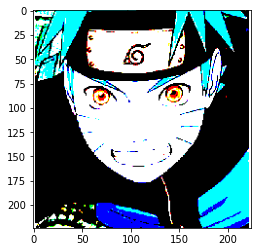

In [ ]:
n=6

plt.imshow(x1[n])
print(y1[n])
print(labels[np.argmax(y1[n])])


In [ ]:

lb = [labels[np.argmax(x)] for x in y1[:10]]
for lb_enc, lb in zip(y1[:10],lb):
    print(lb_enc,"-->",lb)

[0. 0. 1.] --> naruto
[1. 0. 0.] --> bart
[0. 1. 0.] --> homero
[1. 0. 0.] --> bart
[0. 1. 0.] --> homero
[0. 1. 0.] --> homero
[0. 0. 1.] --> naruto
[1. 0. 0.] --> bart
[0. 0. 1.] --> naruto
[0. 1. 0.] --> homero


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import  RMSprop, Adam, Adamax

num_class = 3  # NUESTRO CLASIFICADOR TRABAJA CON 3 CLASES --> Homero, bart, naruto


base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))

# COMIENZO A AGREGAR DISTINTAS CAPAS
# NOTA: ESTO TAMBIEN SE PUEDE HACER MEDIATE UNA RED SECUENCIAL
x = base_model.output
# AGREGAMOS ALGUNAS CAPAS A LA RED BASE
x = GlobalAveragePooling2D(name="GAP2D_Noelia")(x)
x = Dense(512,activation='relu', name="Dense1_Noe")(x)
x = Dropout(0.5, name="Drop1_Noe")(x)
x = Dense(512,activation='relu', name="Dense2_Noe")(x) 
x = Dropout(0.5, name="Drop2_Noe")(x)
# FINALMENTE AGREGO UNA CAPA SOFTMAX CON 3 CLASES
preds = Dense(num_class, activation='softmax', name="Softmax1_Noe")(x) 

# ARMO EL MODELO COMPLETO
model = Model(inputs=base_model.input, outputs=preds)


# Freeze four convolution blocks
for layer in model.layers[:19]:
    layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

model.summary()

0 input_4 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False
19 GAP2D_Noelia True
20 Dense1_Noe True
21 Drop1_Noe True
22 Dense2_Noe True
23 Drop2_Noe True
24 Softmax1_Noe True
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
       

---
### Entrenamiento

#### **Optimizador Adam**

El optimizador Adam es una variante/extensión del descenso por el gradiente estocástico y puede ser utilizado para actualizar los pesos de las redes de una manera mas eficiente.

_Adam utiliza Momentum y Adaptive Learning Rates para converger más rápido._

Adam es diferente a la mayoría de los algoritmos de descenso por el gradiente estocástico. <br>
<br>

**Algoritmos clasicos SGD**
> Los algoritmos de descendo por el gradiente estocásticos utilizan un único _learning rate_ (llamado $\alpha$) para todas las actualizaciones de pesos (W) y el mismo (LR) no cambia durante el entrenamiento.

Los autores de Adam describen que su algoritmo tiene las ventajas de dos variantes del SGD.

* **Adaptive Gradient Algorithm (AdaGrad):** mantiene una tasa de aprendizaje por parámetro que mejora el rendimiento en problemas con gradientes escasos (por ejemplo, problemas de lenguaje natural y visión por computadora).
* **Root Mean Square Propagation (RMSProp):** también mantiene tasas de aprendizaje por parámetro que se adaptan en función del promedio de magnitudes recientes de los gradientes para el peso (por ejemplo, qué tan rápido está cambiando). Esto significa que el algoritmo funciona bien en problemas en línea y no estacionarios (por ejemplo, ruidosos


En Adam, en lugar de adaptar las tasas de aprendizaje de parámetros en función del promedio de los primeros momentos (la media) como en RMSProp, Adam también utiliza el promedio de los segundos momentos de los gradientes (la varianza no centrada).

Específicamente, el algoritmo calcula un promedio móvil exponencial del gradiente y el gradiente cuadrático, y los parámetros beta1 y beta2 controlan las tasas de caída de estos promedios móviles.

El valor inicial de las medias móviles y los valores de beta1 y beta2 cercanos a 1,0 (recomendado) dan como resultado un sesgo de las estimaciones de momento hacia cero. Este sesgo se supera calculando primero las estimaciones sesgadas antes de calcular las estimaciones corregidas por sesgo.

---

```python
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
    **kwargs
)

```

#### **Argumentos**

**learning_rate ($\alpha$):**
> Tasa de aprendizaje o tamaño del paso. La proporción en que los pesos son actualizados. 
* Los valores más grandes (p. ej., 0,3) dan como resultado un aprendizaje inicial más rápido antes de que se actualice la tasa. 
* Los valores más pequeños (por ejemplo, 1.0E-5) ralentizan el aprendizaje durante el entrenamiento. 
* Valor por defecto: 0.001.

**beta_1:**
> Tasa de caída exponencial para las estimaciones del primer momento.
* Valor por defecto: 0.9.

**beta_2:**
> La tasa de caída exponencial para las estimaciones del segundo momento (p. ej., 0,999). Este valor debe establecerse cerca de 1,0 en problemas con un gradiente escaso (NLP y visión artificial)
* Valor por defecto: 0.999.

**epsilon:**
> Es un valor muy pequeño para prevenir divisiones por cero.
* Valor por defecto: 1e-07

**name:**
> Opcional.
* Por defecto: Adam

**amsgrad:**
> Booleano. Aplicar o no la variante AMSGrad del paper "On the Convergence of Adam and beyond".
* Por defecto: False.

****kwargs:**
> ...

---
#### Algunas consideraciones:

El paper de Adam sugiere:
> Good default settings for the tested machine learning problems are alpha=0.001, beta1=0.9, beta2=0.999 and epsilon=10−8

La documentación de TensorFlow sugiere algo ligeramente diferente:
> The default value of 1e-8 for epsilon might not be a good default in general. For example, when training an Inception network on ImageNet a current good choice is 1.0 or 0.1.

---

[Paper original](https://arxiv.org/pdf/1412.6980.pdf)
[Keras Documentation](https://keras.io/api/optimizers/adam/)

---

In [ ]:
# DEFINO LA CANTIDAD DE EPOCAS DE ENTRENAMIENTO
# ATENCION! N0 HAGO EARLY STOP
epochs = 60
# DEFINO LA TASA DE APRENDIZAJE
learning_rate = 0.001
# 00 - lr = 0.0005
# 01 - lr = 0.001

# DEFINO LA TASA DE CAIDA
# decay_rate = learning_rate / epochs
#decay_rate = 0.01
# 00 - decay = learning_rate / epochs
# 01 - decay = 0.01
# 02 - decay = 0.001

# DEFINO EL OPTIMIZADOR
# opt = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=decay_rate, amsgrad=False)
opt = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=0.1, amsgrad=False)
#opt2 = Adamax( learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.02)
# COMPILO EL MODELO - USO CATEGORICAL CROSSENTROPY COMO LOSS FUNCTION
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['categorical_accuracy'])

history = model.fit(x1, y1, epochs=60)

# acc = history.history['categorical_accuracy']
# loss = history.history['loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'b', label='Training categorical_accuracy')
# plt.title('Training accuracy')

# plt.figure()
# plt.plot(epochs, loss, 'b', label='Training loss')
# plt.title('Trainingloss')
# plt.legend()

# plt.show()

Epoch 1/60


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 28s 8s/step - loss: 7.8920 - categorical_accuracy: 0.3289
Epoch 2/60
3/3 [==============================] - 27s 8s/step - loss: 5.2970 - categorical_accuracy: 0.4342
Epoch 3/60
3/3 [==============================] - 27s 8s/step - loss: 3.9721 - categorical_accuracy: 0.4474
Epoch 4/60
3/3 [==============================] - 27s 8s/step - loss: 4.8221 - categorical_accuracy: 0.3816
Epoch 5/60
3/3 [==============================] - 29s 8s/step - loss: 3.3168 - categorical_accuracy: 0.5132
Epoch 6/60
3/3 [==============================] - 27s 8s/step - loss: 2.5899 - categorical_accuracy: 0.6184
Epoch 7/60
3/3 [==============================] - 27s 8s/step - loss: 2.5299 - categorical_accuracy: 0.5658
Epoch 8/60
3/3 [==============================] - 27s 8s/step - loss: 3.0195 - categorical_accuracy: 0.5658
Epoch 9/60
3/3 [==============================] - 27s 8s/step - loss: 1.7616 - categorical_accuracy: 0.6974
Epoch 10/60
3/3 [======================

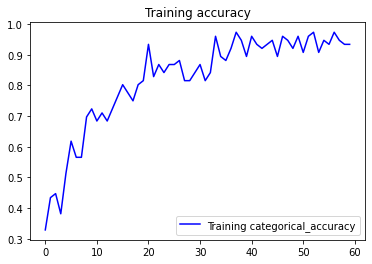

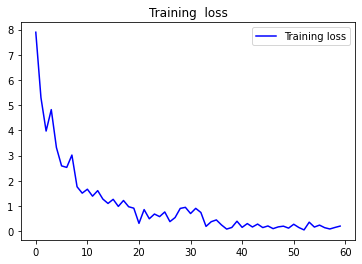

In [ ]:
acc = history.history['categorical_accuracy']    


loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training categorical_accuracy')

plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')

plt.title('Training  loss')
plt.legend()

plt.show()

In [ ]:
# prediction1 = model.predict(x1[0], verbose=1)
evaluation1 = model.evaluate(x1, y1)

3/3 [==============================] - 28s 8s/step - loss: 7.0276e-04 - categorical_accuracy: 1.0000


In [ ]:
%cd "/content/drive/My Drive/DatosParaColab/Imagenes/simpson_naruto/"
%ls

/content/drive/My Drive/DatosParaColab/Imagenes/simpson_naruto
bart/  homero/  naruto/


In [ ]:
import os

barts = os.listdir('/content/drive/My Drive/DatosParaColab/Imagenes/simpson_naruto/bart/')
homeros = os.listdir('/content/drive/My Drive/DatosParaColab/Imagenes/simpson_naruto/homero/')
narutos = os.listdir('/content/drive/My Drive/DatosParaColab/Imagenes/simpson_naruto/naruto/')
print(barts)
print("\n", homeros)
print("\n", narutos)

['bart1.png', 'bart2.png', 'bart3.png', 'bart4.png', 'bart5.png', 'bart6.jpeg', 'bart7.png', 'bart8.png', 'bart9.png', 'bart10.png', 'bart11.jpeg', 'bart12.jpeg', 'bart13.png', 'bart14.jpeg', 'bart15.jpeg', 'bart16.png', 'bart17.png', 'bart18.png', 'bart19.png', 'bart20.jpeg', 'bart21.jpeg', 'bart20.jpg', 'bart22.jpeg', 'bart23.png', 'bart24.png', 'bart25.png']

 ['homero1.png', 'homero2.png', 'homero3.jpeg', 'homero4.jpeg', 'homero5.jpeg', 'homero6.jpeg', 'homero7.png', 'homero8.jpeg', 'homero9.jpg', 'homero10.jpeg', 'homero11.jpg', 'homero12.jpg', 'homero13.jpeg', 'homero14.jpeg', 'homero15.jpeg', 'homero16.jpeg', 'homero17.png', 'homero18.png', 'homero19.jpg', 'homero20.jpeg', 'homero21.jpeg', 'homero23.jpeg', 'homero24.jpeg', 'homero25.png', 'homero22.jpg']

 ['naruto1.jpeg', 'naruto2.jpeg', 'naruto3.jpeg', 'naruto4.jpeg', 'naruto5.jpeg', 'naruto6.jpeg', 'naruto7.jpeg', 'naruto8.jpeg', 'naruto9.jpg', 'naruto10.jpeg', 'naruto11.jpeg', 'naruto12.jpg', 'naruto13.jpeg', 'naruto14.jpeg'

In [ ]:
from keras.applications.vgg16 import decode_predictions
# load an image from file
def clasifica(lista, path):
    
    for my_file in lista:
        image1 = load_img(path+my_file, target_size=(224, 224))
        # convert the image pixels to a numpy array
        image = img_to_array(image1)
        # reshape data for the model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        # prepare the image for the VGG model
        image = preprocess_input(image)

        # predict the probability across all output classes
        yhat = model.predict(image)
        pred_label = np.argmax(yhat)
        pred_label_cat = labels[pred_label]

        print("--------------------------------------------------")
        print("Archivo --> ",my_file )
        print("yhat --> ",yhat)
        print("pred_label --> ",pred_label)
        print("pred_label_cat -->",pred_label_cat)
        print("--------------------------------------------------")
        # # convert the probabilities to class labels
        # #label = decode_predictions(yhat)
        # # retrieve the most likely result, e.g. highest probability
        # label = label[0][0]
        # # print the classification
        # print('%s (%.2f%%)' % (label[1], label[2]*100))

        # import numpy as np

        image1 = np.array(image1)
        plt.figure()
        plt.imshow(image1)
        plt.title(pred_label_cat)

1/1 [==============================] - 0s 477ms/step
--------------------------------------------------
Archivo -->  bart1.png
yhat -->  [[9.9999988e-01 5.4167327e-08 1.0548014e-07]]
pred_label -->  0
pred_label_cat --> bart
--------------------------------------------------
1/1 [==============================] - 0s 381ms/step
--------------------------------------------------
Archivo -->  bart2.png
yhat -->  [[1.0000000e+00 1.7958930e-08 6.2835796e-12]]
pred_label -->  0
pred_label_cat --> bart
--------------------------------------------------
1/1 [==============================] - 0s 376ms/step
--------------------------------------------------
Archivo -->  bart3.png
yhat -->  [[1.0000000e+00 2.1876483e-08 8.7523072e-11]]
pred_label -->  0
pred_label_cat --> bart
--------------------------------------------------
1/1 [==============================] - 0s 385ms/step
--------------------------------------------------
Archivo -->  bart4.png
yhat -->  [[9.9999940e-01 6.5069577e-07 1.989

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1/1 [==============================] - 0s 383ms/step
--------------------------------------------------
Archivo -->  bart20.jpg
yhat -->  [[9.9968803e-01 2.7687478e-04 3.5195073e-05]]
pred_label -->  0
pred_label_cat --> bart
--------------------------------------------------
1/1 [==============================] - 0s 379ms/step
--------------------------------------------------
Archivo -->  bart22.jpeg
yhat -->  [[9.9978513e-01 2.1472857e-04 6.9535695e-08]]
pred_label -->  0
pred_label_cat --> bart
--------------------------------------------------
1/1 [==============================] - 0s 383ms/step
--------------------------------------------------
Archivo -->  bart23.png
yhat -->  [[9.9999619e-01 3.3788092e-06 4.5400404e-07]]
pred_label -->  0
pred_label_cat --> bart
--------------------------------------------------
1/1 [==============================] - 0s 371ms/step
--------------------------------------------------
Archivo -->  bart24.png
yhat -->  [[9.9275219e-01 7.2208410e-03 

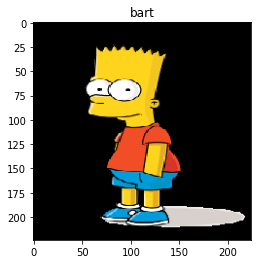

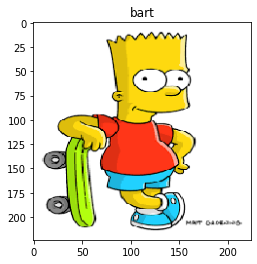

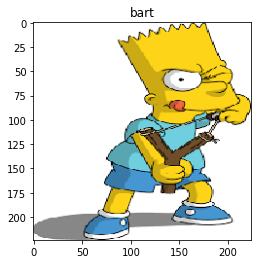

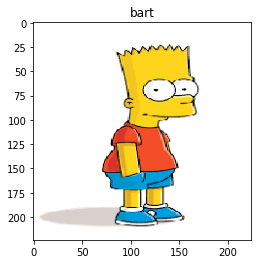

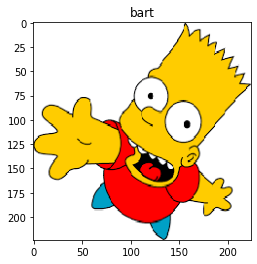

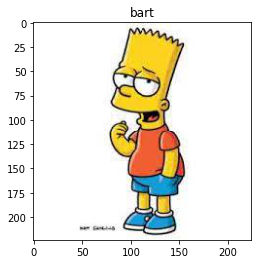

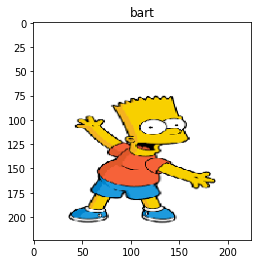

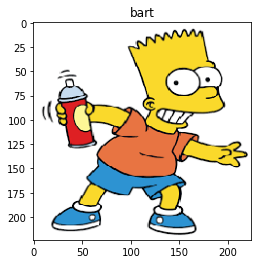

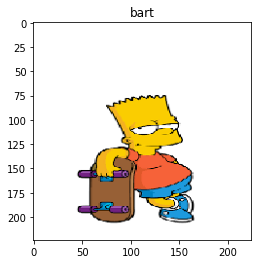

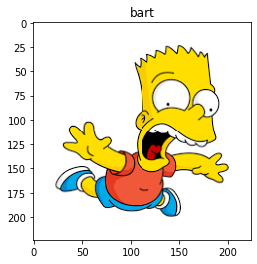

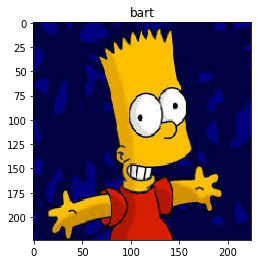

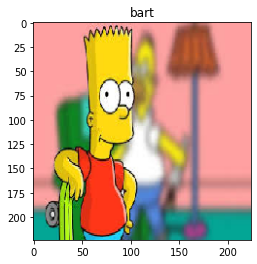

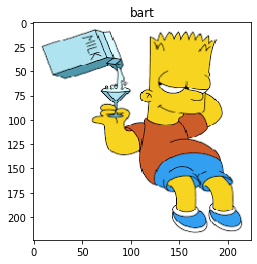

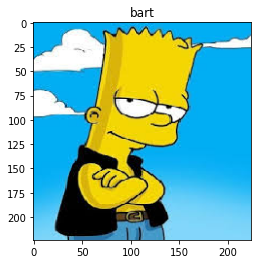

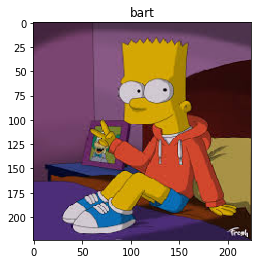

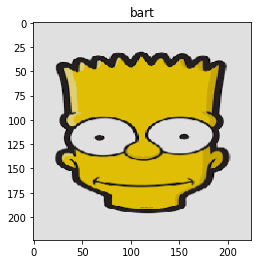

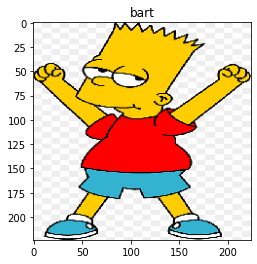

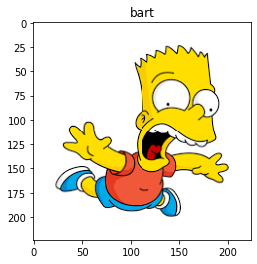

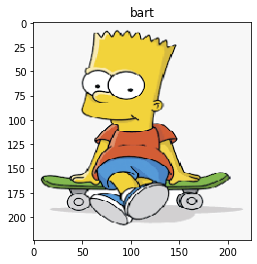

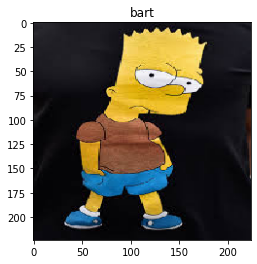

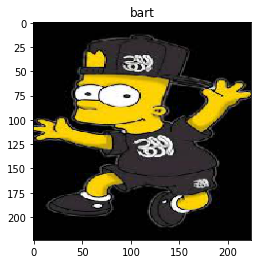

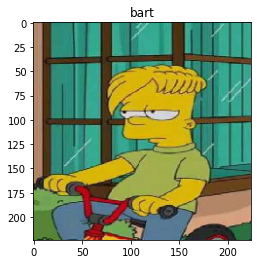

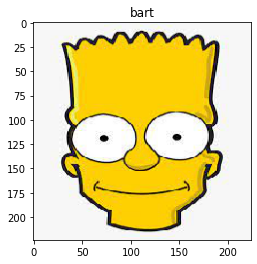

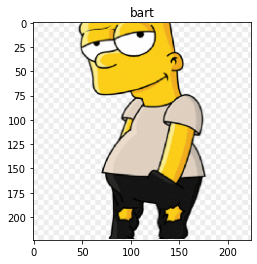

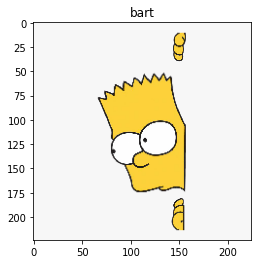

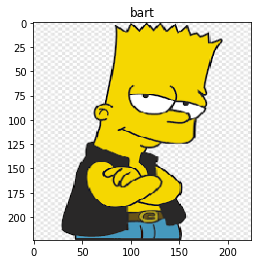

In [ ]:
path = "/content/drive/My Drive/DatosParaColab/Imagenes/simpson_naruto/bart/"
clasifica(barts, path)

/content/drive/My Drive/DatosParaColab/Imagenes/simpson_naruto_test
['naruto101.jpg', 'bart100.jpg', 'homero101.jpg', 'homero100.jpeg', 'bart101.jpg', 'naruto100.jpeg', 'bart105.png', 'bart104.jpeg', 'bart103.jpg', 'bart102.png', 'homero105.jpeg', 'homero103.jpeg', 'homero102.jpeg', 'homero104.png', 'naruto105.jpeg']
1/1 [==============================] - 0s 376ms/step
--------------------------------------------------
Archivo -->  naruto101.jpg
yhat -->  [[1.2467025e-07 3.1147593e-08 9.9999988e-01]]
pred_label -->  2
pred_label_cat --> naruto
--------------------------------------------------
1/1 [==============================] - 0s 373ms/step
--------------------------------------------------
Archivo -->  bart100.jpg
yhat -->  [[1.9047341e-01 8.0950153e-01 2.5011455e-05]]
pred_label -->  1
pred_label_cat --> homero
--------------------------------------------------
1/1 [==============================] - 0s 381ms/step
--------------------------------------------------
Archivo -->  ho

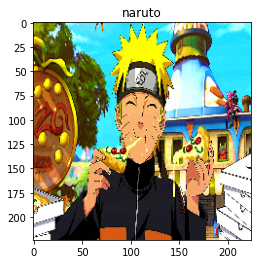

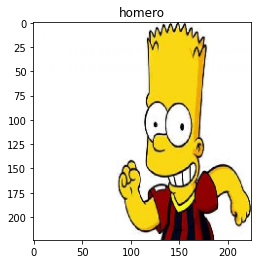

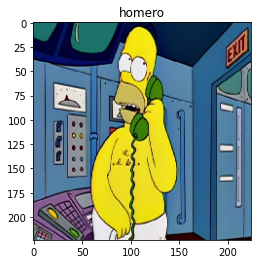

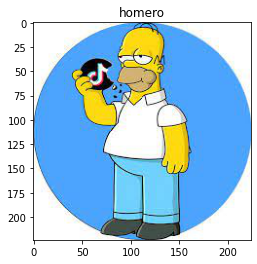

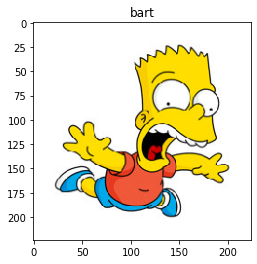

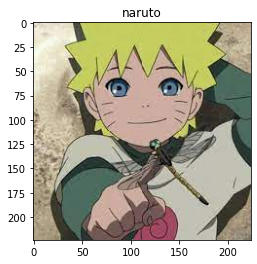

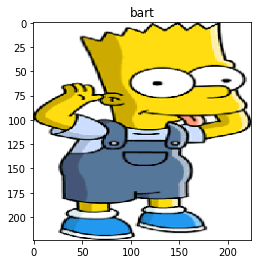

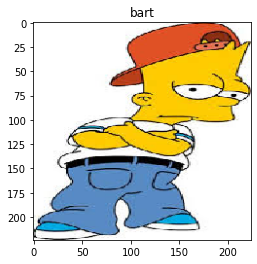

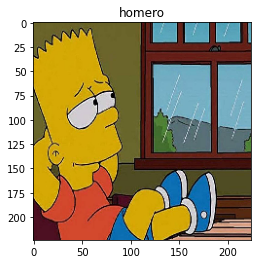

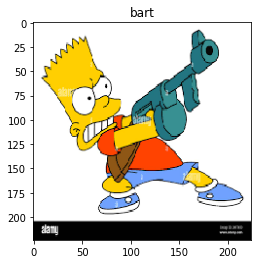

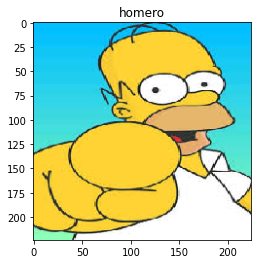

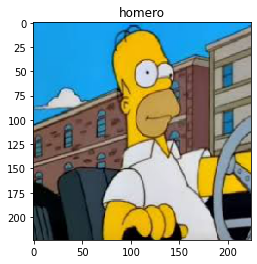

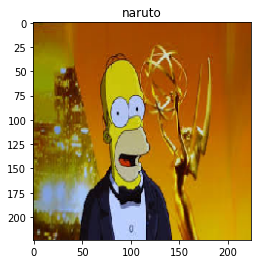

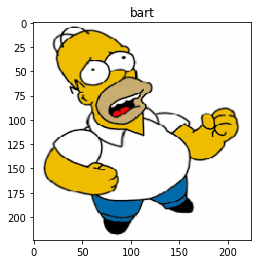

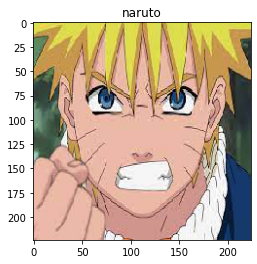

In [ ]:
%cd "/content/drive/My Drive/DatosParaColab/Imagenes/simpson_naruto_test/"
path2 = '/content/drive/My Drive/DatosParaColab/Imagenes/simpson_naruto_test/'
tests = os.listdir('/content/drive/My Drive/DatosParaColab/Imagenes/simpson_naruto_test')
print(tests)
clasifica(tests, path2)